In [1]:
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
from math import log,sqrt,pi

Opening logs/fglog191010135444.csv
Processed 168 lines.


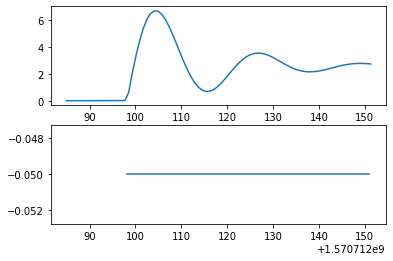

In [5]:
from fgplot import import_log
data_dict = import_log('logs/fglog191010135444.csv')

plt.figure()
ax=plt.subplot(2,1,1)
(th,h)=data_dict['/velocities/vertical-speed-fps']
plt.plot(th,h)

plt.subplot(2,1,2,sharex=ax)
(te,e)=data_dict['/controls/flight/elevator']
plt.plot(te,e)

plt.show()

In [31]:
p1 = 13.4
p2 = 7.6
y0 = 1.2
yss = 5.5
uss = -0.05
T = 93-72

In [32]:
logdec = log((p1-yss)/(p2-yss))
print('logdec=',logdec)
zeta = 1/sqrt(1+(2*pi/logdec)**2)
print('zeta=',zeta)
wd = 2*pi/T
print('wd=',wd)
wn = wd/sqrt(1-zeta**2)
print('wn=',wn)
k = (yss-y0)/uss
print('k=',k)

logdec= 1.3249254147435987
zeta= 0.2063310147175011
wd= 0.2991993003418851
wn= 0.30577897609210164
k= -85.99999999999999


In [51]:
A = np.array([[0,1],[-wn*wn,-2*zeta*wn]])
B = np.array([[1.0],[0.0]])
C = np.array([[-k*wn*wn,0]])*4.5
D = np.array([0])
(A,B,C,D)

(array([[ 0.        ,  1.        ],
        [-0.09350078, -0.12618337]]), array([[1.],
        [0.]]), array([[36.18480272,  0.        ]]), array([0]))

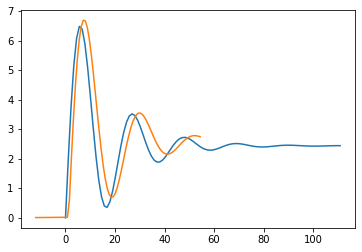

In [55]:
(t,y) = scipy.signal.step((A,B,C,D))
plt.plot(t,y*-uss)
plt.plot([tv - th[0]-12 for tv in th],h)
plt.show()

In [38]:
scipy.signal.ss2tf(A,B,C,D)

(array([[0.        , 8.04106727, 1.81875572]]),
 array([1.        , 0.12618337, 0.09350078]))

In [8]:
w,v = np.linalg.eig(A)
w

array([-0.06309169+0.2991993j, -0.06309169-0.2991993j])

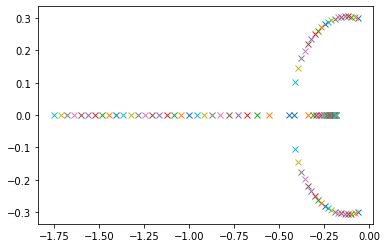

In [88]:
plt.figure()
for kp in np.linspace(0,0.05):
    Acl = A-kp*np.dot(B,C)
    w,v = np.linalg.eig(Acl)
    plt.plot(np.real(w),np.imag(w),'x')
plt.show()

In [89]:
kp = 0.0204
Acl = A-kp*np.dot(B,C)
w,v = np.linalg.eig(Acl)
w

array([-0.44362736, -0.42072599])

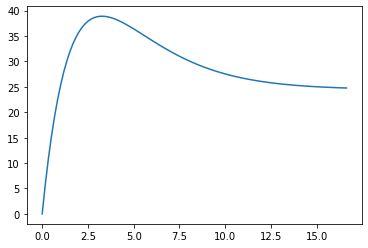

In [90]:
(t,y) = scipy.signal.step((Acl,B,C,D))
plt.plot(t,y)
plt.show()

In [84]:
%run fgplot.py fglog191009211058.csv

Opening fglog191009211058.csv


FileNotFoundError: [Errno 2] No such file or directory: 'fglog191009211058.csv'

/home/aeagr-l/python/control_tutorial/venv/lib/python3.6/site-packages/scipy/signal/filter_design.py:1619: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


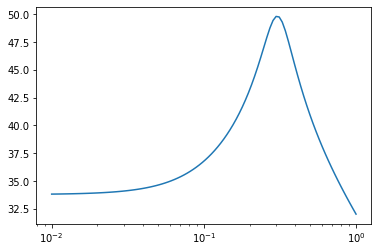

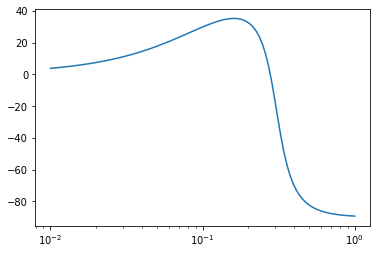

In [85]:
w,mag,phase = scipy.signal.bode((A,B,C,D))
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()